In [1]:
'''
Loading the necessary libraries
'''
import os
import numpy as np
import torch
import glob
import torch.nn as nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.autograd import Variable
import torchvision
import pathlib
import matplotlib.pyplot as plt
import torch.nn as nn
from torchvision.transforms import transforms
from torch.autograd import Variable
import torch.functional as F
from PIL import Image
from io import open
from torchvision import datasets, transforms
from PIL import Image
import cv2
import csv
import pandas as pd
from torch import optim
import torch.nn as nn
import torchvision.models as models
import shutil

In [2]:
'''
Checking which device is available (GPU or CPU)
'''
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [3]:
'''
Transforms Image Preprocessing Pipeline for the images in Training and Testing 
- The settings for resizing the image can be changed for experimentation, feel free to resize however based on the results
'''
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),                     
    transforms.Normalize((0.5,), (0.5,))        
])

In [4]:
'''
Load the training and testing dataset 
- Make sure the folder applies the preprocessing transformation to make sure all the image has the same size format and is convert to a tensor
- The batch size for training and testing can be changed for experimentation, but the best performing prediction so far uses 64 batch size for training and testing
'''
train_dataset = datasets.ImageFolder(root = '/location/of/train/dataset', transform=transform)
test_dataset = datasets.ImageFolder(root = '/location/of/test/dataset', transform=transform)

batch_size = 64
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size , shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size , shuffle=False)

In [7]:
model = models.mobilenet_v2(weights=None)
num_ftrs = model.classifier[-1].in_features
model.classifier[-1] = nn.Linear(num_ftrs, 6)  # Modify the last layer for 3 classes
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
model.train()

MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

#### Training the Model

In [8]:
import matplotlib.pyplot as plt

# Train the model for 10 epochs
train_acc_list = []
train_loss_list = []
test_acc_list = []
test_loss_list = []

for epoch in range(15):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(train_dataloader, 0):
        # Get the inputs and labels
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Compute statistics
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    # Print the training accuracy and loss
    train_acc = 100 * correct / total
    train_loss = running_loss / len(train_dataloader)
    print('Epoch %d, training accuracy: %.2f%%, training loss: %.4f' % (epoch+1, train_acc, train_loss))
    
    # Add the training accuracy and loss to the lists
    train_acc_list.append(train_acc)
    train_loss_list.append(train_loss)

    # Evaluate the model on the test set
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_dataloader:
            # Get the inputs and labels
            inputs, labels = data

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Compute statistics
            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    # Print the test accuracy and loss
    test_acc = 100 * correct / total
    test_loss /= len(test_dataloader)
    print('Epoch %d, testing accuracy: %.2f%%, testing loss: %.4f' % (epoch+1, test_acc, test_loss))
    
    # Add the test accuracy and loss to the lists
    test_acc_list.append(test_acc)
    test_loss_list.append(test_loss)

Epoch 1, training accuracy: 66.22%, training loss: 0.8662
Epoch 1, testing accuracy: 75.17%, testing loss: 0.6987
Epoch 2, training accuracy: 78.26%, training loss: 0.6005
Epoch 2, testing accuracy: 74.83%, testing loss: 0.7129
Epoch 3, training accuracy: 81.50%, training loss: 0.5126
Epoch 3, testing accuracy: 79.90%, testing loss: 0.5644
Epoch 4, training accuracy: 83.86%, training loss: 0.4598
Epoch 4, testing accuracy: 78.67%, testing loss: 0.5898
Epoch 5, training accuracy: 85.37%, training loss: 0.4096
Epoch 5, testing accuracy: 78.90%, testing loss: 0.6319
Epoch 6, training accuracy: 86.32%, training loss: 0.3834
Epoch 6, testing accuracy: 83.83%, testing loss: 0.4638
Epoch 7, training accuracy: 87.70%, training loss: 0.3535
Epoch 7, testing accuracy: 80.87%, testing loss: 0.5450
Epoch 8, training accuracy: 88.87%, training loss: 0.3191
Epoch 8, testing accuracy: 79.37%, testing loss: 0.6297
Epoch 9, training accuracy: 89.57%, training loss: 0.2994
Epoch 9, testing accuracy: 83.

In [9]:
'''
Saving the model to a specific location of your choice with the name
- This naming format is set to "ModelName_DataUsed_Accuracy.model"
'''
model_path = 'MobileNet_92acc_83t.model' 
torch.save(model.state_dict(), model_path)

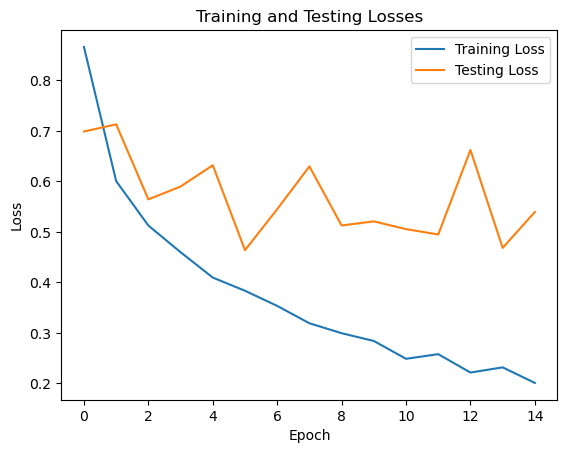

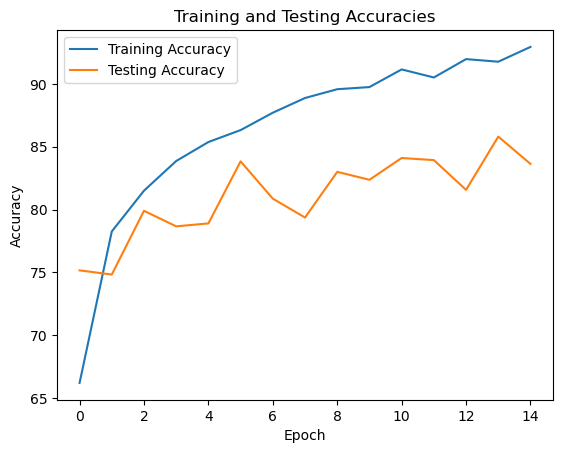

In [10]:
# plot training and testing losses
plt.plot(train_loss_list, label='Training Loss')
plt.plot(test_loss_list, label='Testing Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Losses')
plt.show()

# plot training and testing accuracies
plt.plot(train_acc_list, label='Training Accuracy')
plt.plot(test_acc_list, label='Testing Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracies')
plt.show()